In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [5]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [6]:
epgExpOutbCDFT = epgExpOutb.loc[exp_1g_corr.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[pi0ExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0SimOutbFD = pi0SimOutb.loc[pi0SimOutb.config == 1]

In [7]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [8]:
epgExpInb = copy(exp_1g_corr)
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = df_3987_corr
bkgSimInb = df_4076_1g_corr
pi0SimInb = df_4076_2g_corr

In [9]:
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [10]:
contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

In [11]:
print(contFD, contCD ,contCDFT)

0.3317533255477056 0.09930772818568234 0.002674138783711293


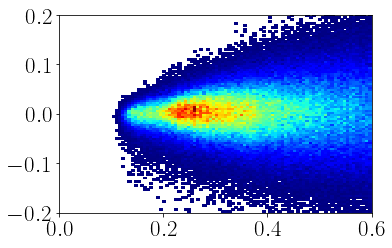

In [55]:
plt.hist2d(2*M*(np.sqrt(pi0SimInb.GenPp**2+M**2)-M),  (2*M*(np.sqrt(pi0SimInb.GenPp**2+M**2)-M)- pi0SimInb.t1), bins = [np.linspace(0,0.6,101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin = 1)
plt.show()

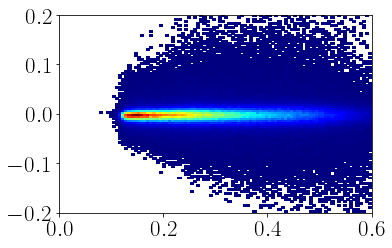

In [56]:
plt.hist2d(dvcsSimInb.Gent2, (dvcsSimInb.t2-dvcsSimInb.Gent2), bins = [np.linspace(0,0.6,101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin = 1)
plt.show()

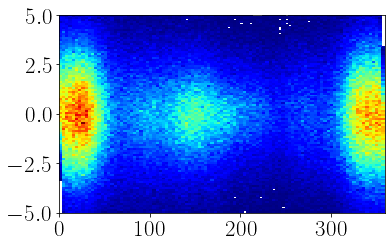

In [59]:
plt.hist2d(dvcsSimInb.Genphi2, (dvcsSimInb.phi1-dvcsSimInb.Genphi2), bins = [101, np.linspace(-5, 5, 101)], cmap = cmap, cmin = 1)
plt.show()

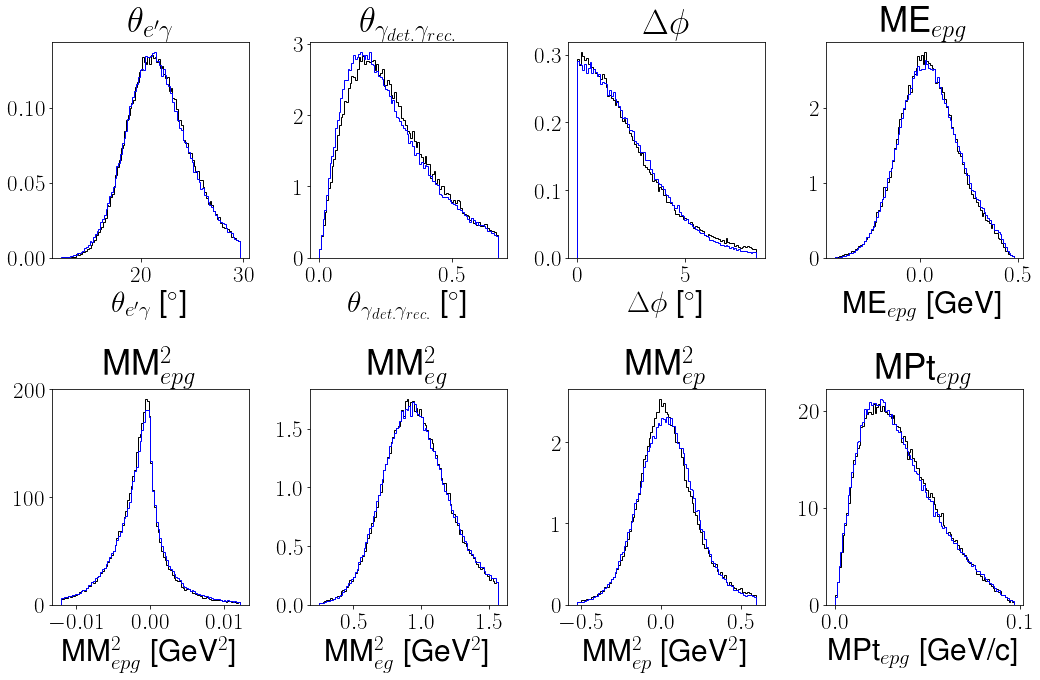

<Figure size 432x288 with 0 Axes>

In [12]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        _, bins, _ = axs[yind, xind].hist(dvcsSimInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.932825548628614
reconGam 0.28865630414524446
coplanarity 2.1468114569656467
ME_epg 0.0009588686332147068
MM2_epg -0.0014212241042120663
MM2_eg 0.8866502092444611
MM2_ep 0.0006416925323809008
MPt 0.047315268275303544


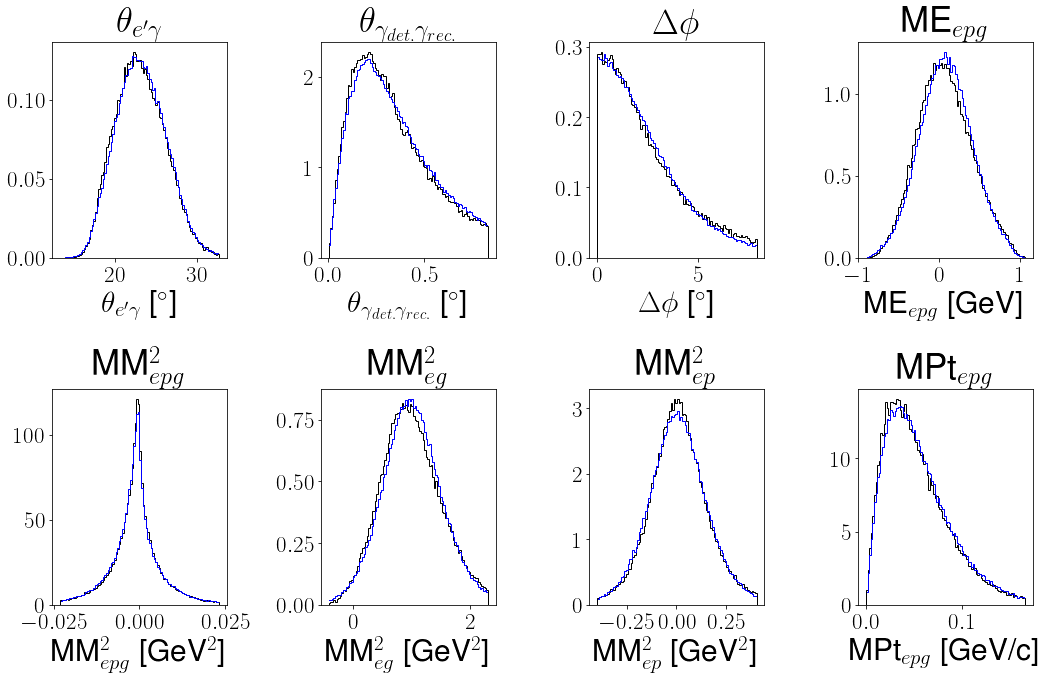

<Figure size 432x288 with 0 Axes>

In [13]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [14]:
def saveDVCSvars(df_epg):
    #set up dvcs variables

    df_epg = copy(df_epg)
    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[:, 'Ptheta'] = df_epg.Ptheta + 0.07*(df_epg.Ptheta-30 + np.abs(df_epg.Ptheta-30))
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg

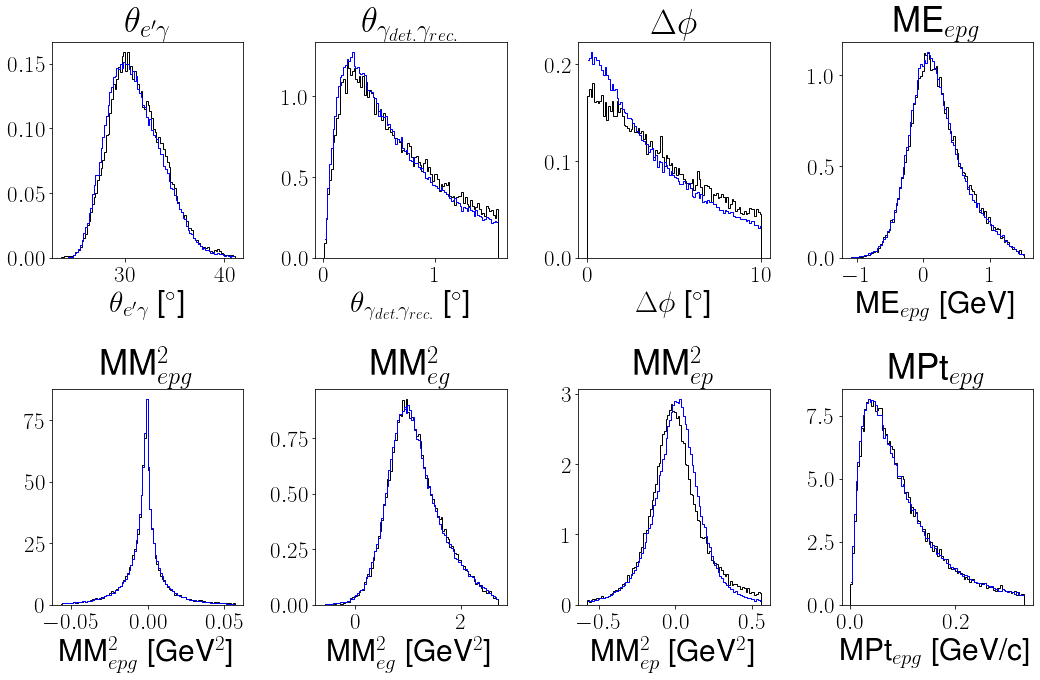

<Figure size 432x288 with 0 Axes>

In [87]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0.4, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2:
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")

plt.show()
plt.clf()

In [104]:
contFD = len(pi0ExpOutbFD)*len(bkgSimOutbFD)/len(pi0SimOutbFD)/len(epgExpOutbFD)
contCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)

In [105]:
print(contFD, contCD ,contCDFT)

0.439159802480252 0.1480837405872049 0.003214599709984976


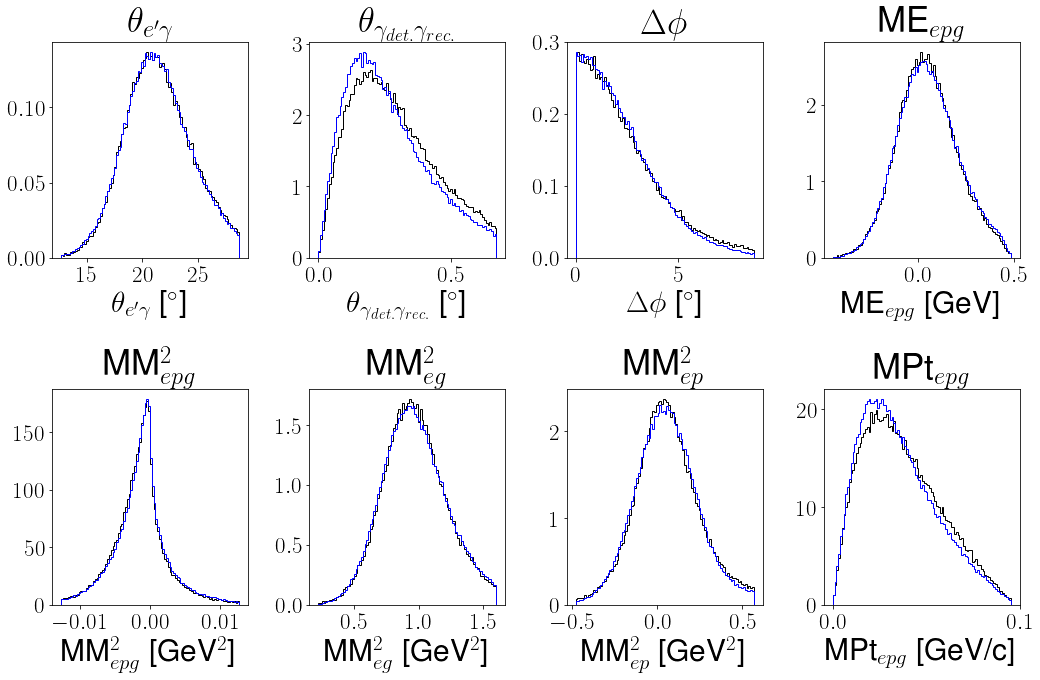

<Figure size 432x288 with 0 Axes>

In [106]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.5, 10, 0.6, 0.01, 1.7, 0.4, 0.1]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        _, bins, _ = axs[yind, xind].hist(dvcsSimOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

coneAngle 21.669347475071206
reconGam 0.3483795490694636
coplanarity 2.0573157462559926
ME_epg 0.03197872960417007
MM2_epg -0.0013650535747386134
MM2_eg 0.9331189547771728
MM2_ep 0.023146089758034172
MPt 0.05079745179368659


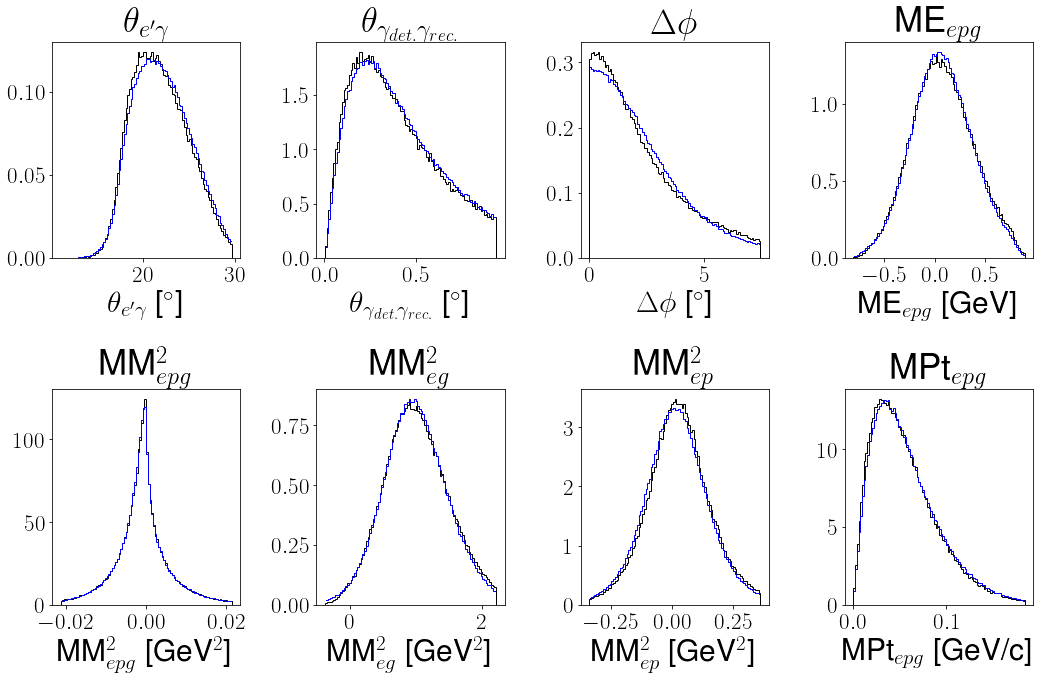

<Figure size 432x288 with 0 Axes>

In [107]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

In [108]:
def smearingDVCS4(df_epg, sigma = 0, sigma2 = 0, sigma3 = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector<7, 'Pp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Pp']
    df_epg.loc[df_epg.Psector<7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector<7, 'Pp']**2+M**2)
    df_epg.loc[df_epg.Psector<7, 'Ptheta'] = np.random.normal(0, sigma2, len(df_epg.loc[df_epg.Psector<7]))+df_epg.loc[df_epg.Psector<7, 'Ptheta']
    df_epg.loc[df_epg.Psector>7, 'Pphi'] = np.random.normal(0, sigma3, len(df_epg.loc[df_epg.Psector<7]))+df_epg.loc[df_epg.Psector<7, 'Pphi']
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg

In [109]:
def saveDVCSvars(df_epg):
    #set up dvcs variables

    df_epg = copy(df_epg)
    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[:, 'Ptheta'] = df_epg.Ptheta + 0.05*(df_epg.Ptheta-25 + np.abs(df_epg.Ptheta-25))
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg

coneAngle 30.595555874162876
reconGam 0.8069852419469924
coplanarity 3.656743539717429
ME_epg 0.23094797152374963
MM2_epg -0.0026793528851045
MM2_eg 1.1644102280656234
MM2_ep 0.0256430778191504
MPt 0.09832635143618514


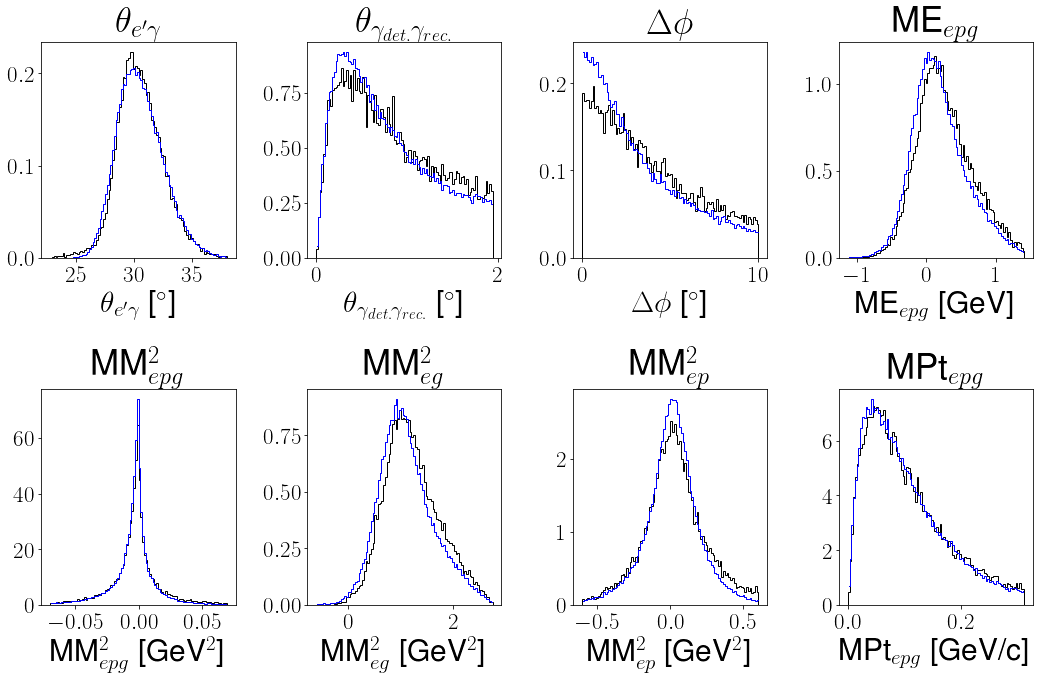

<Figure size 432x288 with 0 Axes>

In [110]:
df2 = bkgSimOutbFD
df1 = dvcsSimOutbFD
df3 = epgExpOutbFD#saveDVCSvars(epgExpOutbFD)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0.4, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2:
            bins = np.linspace(0, 10, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbFD)/len(pi0SimOutbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

Pp 0.7055202251152402
Ptheta 34.673060018221534
Pphi -1.891854487470897
reconGam 0.8069852419469924
coplanarity 3.656743539717429
ME_epg 0.23094797152374963
MM2_epg -0.0026793528851045
MM2_ep 0.0256430778191504
MPt 0.09832635143618514


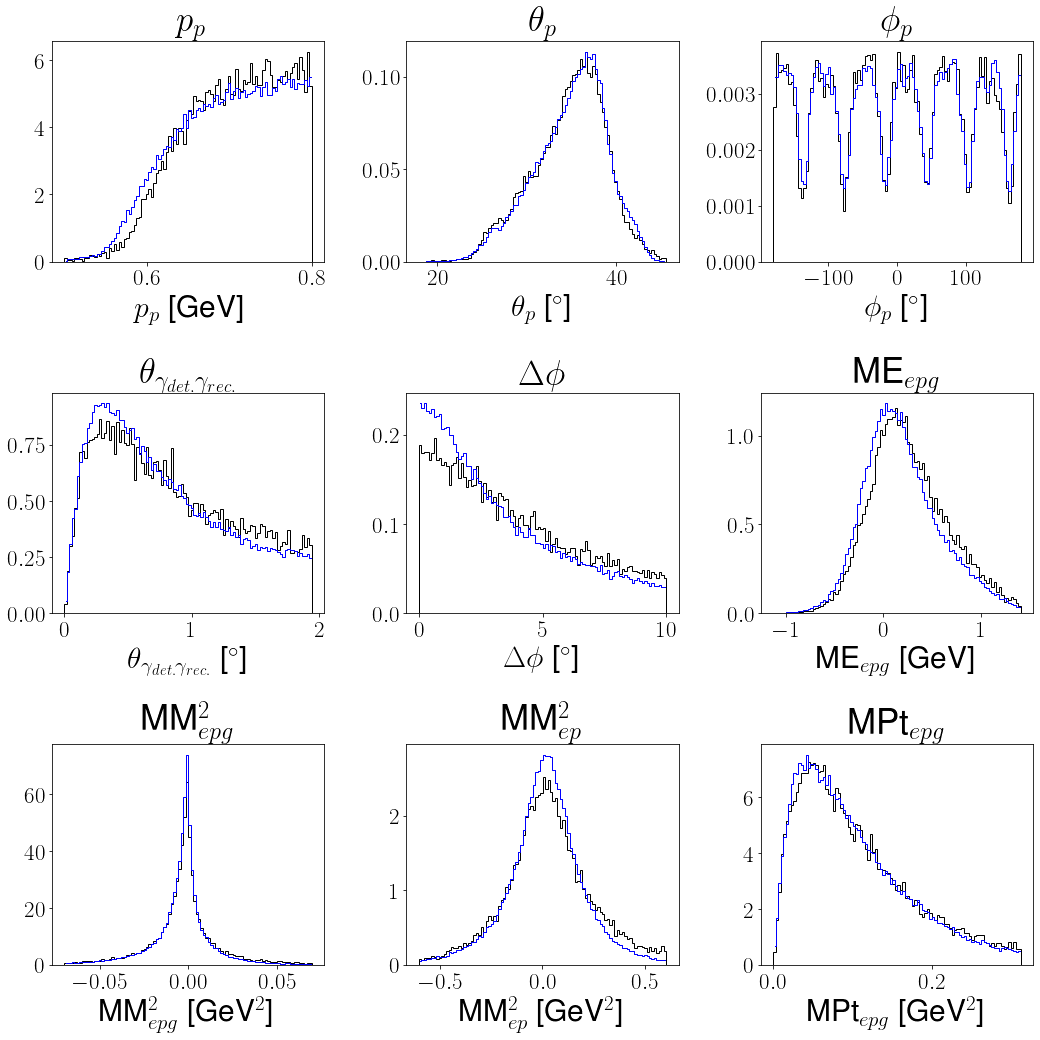

<Figure size 432x288 with 0 Axes>

In [116]:
# df2 = smearingDVCS4(bkgSimOutbFD, np.abs(0.08*(1/(1+np.exp(-(bkgSimOutbFD.loc[bkgSimOutbFD["Psector"]<7, "Pp"]-0.5)/0.075))-0.5)))
# df1 = smearingDVCS4(dvcsSimOutbFD, np.abs(0.08*(1/(1+np.exp(-(dvcsSimOutbFD.loc[dvcsSimOutbFD["Psector"]<7, "Pp"]-0.5)/0.075))-0.5)))
df2 = bkgSimOutbFD
df1 = dvcsSimOutbFD
df3 = epgExpOutbFD#saveDVCSvars(epgExpOutbFD)

varstoplot = ["Pp", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p}$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0.2, 15, -180, 0, 0, -0.5, -0.01, -0.4, 0]
binends = [0.9, 45, 180, 1, 10, 1.2, 0.01, 0.4, 0.2]
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 4:
            bins = np.linspace(0, 10, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbFD)/len(pi0SimOutbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

Gp
Gtheta
Gphi
coneAngle
reconGam
t2
ME_epg
MM2_epg
MM2_eg
MPt


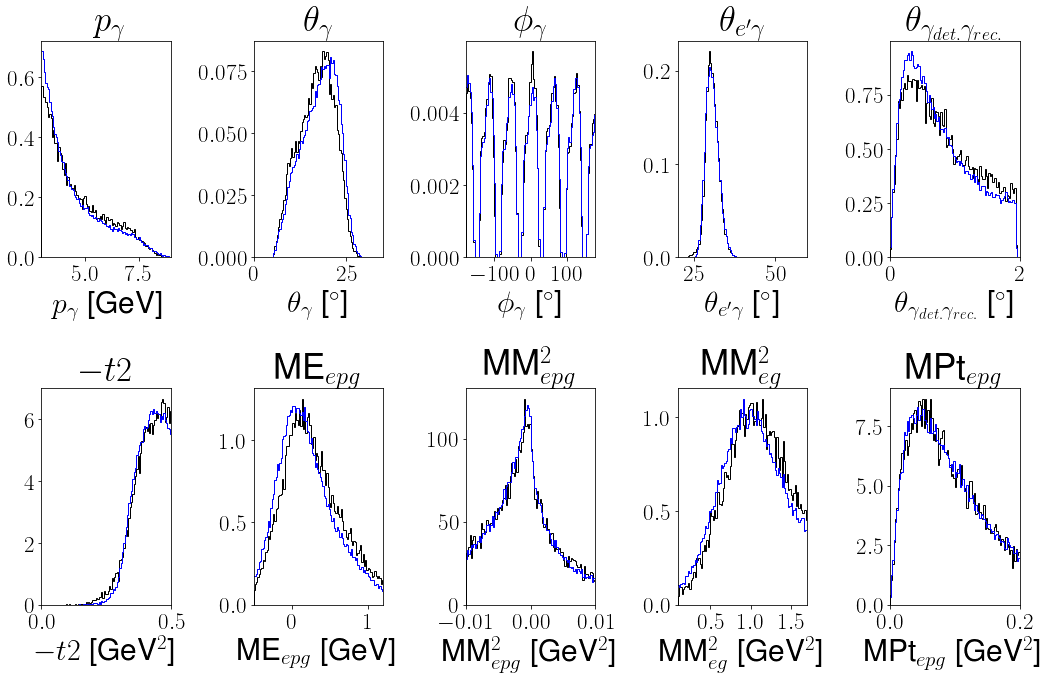

<Figure size 432x288 with 0 Axes>

In [112]:
df1 = dvcsSimOutbFD
df2 = bkgSimOutbFD

#photon related
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "t2", "ME_epg", "MM2_epg", "MM2_eg", "MPt"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$-t2$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV2, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [3, 0, -180, 20, 0, 0, -0.5, -0.01, 0.1, 0]
binends = [9, 35, 180, 60, 2, .5, 1.2, 0.01, 1.7, 0.2]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
#         expDist, bins = np.histogram(correctDVCS(epgExpInbCDFT, 0.25)[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpOutbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind])#, nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

<AxesSubplot:>

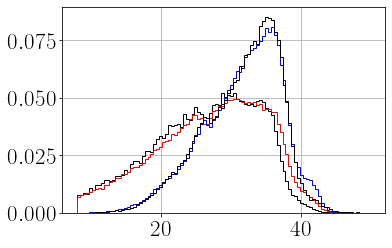

In [45]:
(pi0ExpInbFD.Ptheta).hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'k')
pi0SimInbFD.Ptheta.hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'r')
pi0SimOutbFD.Ptheta.hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'b')
(pi0ExpOutbFD.Ptheta + 0.05*(np.abs(pi0ExpOutbFD.Ptheta-27)+pi0ExpOutbFD.Ptheta-27)).hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'k')

<AxesSubplot:>

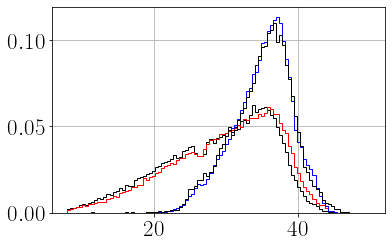

In [26]:
(epgExpInbFD.Ptheta ).hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'k')
dvcsSimInbFD.Ptheta.hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'r')
dvcsSimOutbFD.Ptheta.hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'b')
(epgExpOutbFD.Ptheta + 0.05*(np.abs(epgExpOutbFD.Ptheta-25)+epgExpOutbFD.Ptheta-25)).hist(bins = np.linspace(8, 50, 101), density = True, histtype = 'step', color = 'k')

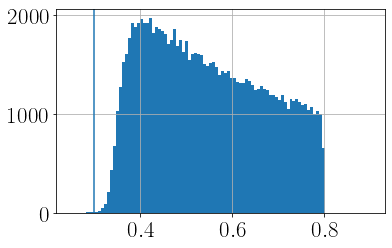

In [70]:
epgExpOutbCDFT.Pp.hist(bins = np.linspace(0.25, 0.9, 101))
plt.axvline(0.3)

Text(0.5, 0, '$Pp$ [GeV/c]')

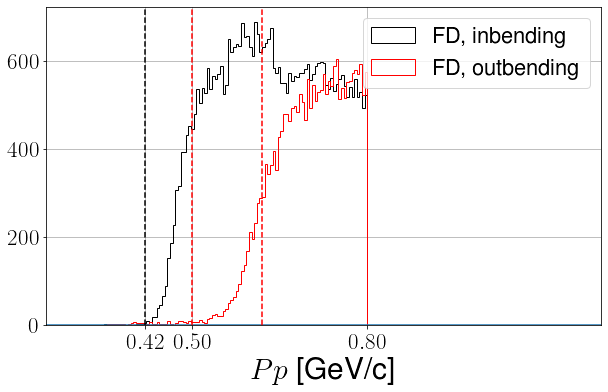

In [63]:

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbFD.Pp.hist(bins = np.linspace(0.35, 0.8, 101), histtype = 'step', color = 'k', label = 'FD, inbending')
epgExpOutbFD.Pp.hist(bins = np.linspace(0.35, 0.8, 101), histtype = 'step', color = 'r', label = 'FD, outbending')
# dvcsSimOutbFD.Pp.hist(bins = np.linspace(0.5, 0.8, 101), density = True, histtype = 'step', color = 'b', label = 'FD, outbending')
plt.xlim([0.25, 1.2])
plt.axhline(0.001)
plt.legend(loc = 'best')
plt.xticks([0.42, 0.5, 0.8])
plt.axvline(0.42, color = 'k', linestyle = '--')
plt.axvline(0.5, color = 'r', linestyle = '--')
plt.axvline(0.62, color = 'r', linestyle = '--')
# plt.axvline(0.65, color = 'r', linestyle = '--')
plt.xlabel(r"$Pp$"+" ["+GeVc+"]")

In [65]:
print(len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT))
print(len(epgExpOutbFD), len(epgExpOutbCD), len(epgExpOutbCDFT))

41656 96252 95196
22316 197217 101836


Text(0.5, 0, '$Pp$ [GeV/c]')

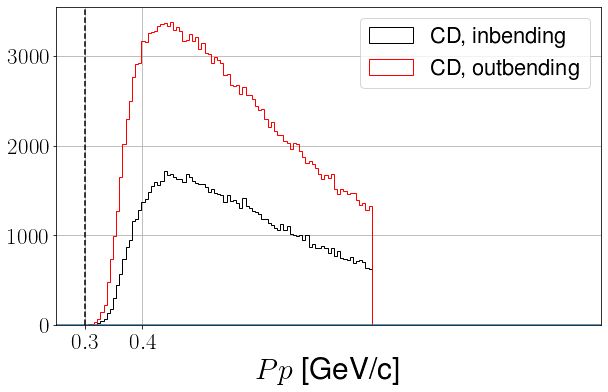

In [66]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCD.Pp.hist(bins = np.linspace(0.25, 0.8, 101), histtype = 'step', color = 'k', label = 'CD, inbending')
epgExpOutbCD.Pp.hist(bins = np.linspace(0.25, 0.8, 101), histtype = 'step', color = 'r', label = 'CD, outbending')
plt.xlim([0.25, 1.2])
plt.axhline(0.001)
plt.legend(loc = 'best')
plt.xticks([0.3, 0.4])
plt.axvline(0.3, color = 'k', linestyle = '--')
# plt.axvline(0.55, color = 'r', linestyle = '--')
# plt.axvline(0.65, color = 'r', linestyle = '--')
plt.xlabel(r"$Pp$"+" ["+GeVc+"]")

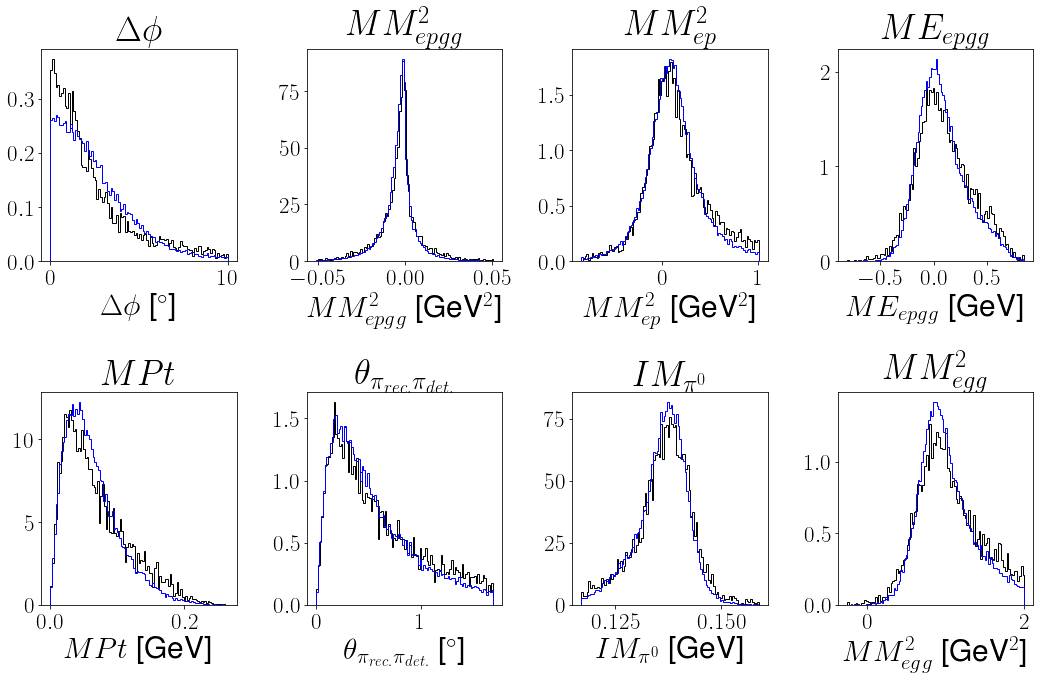

In [157]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 0:
            bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

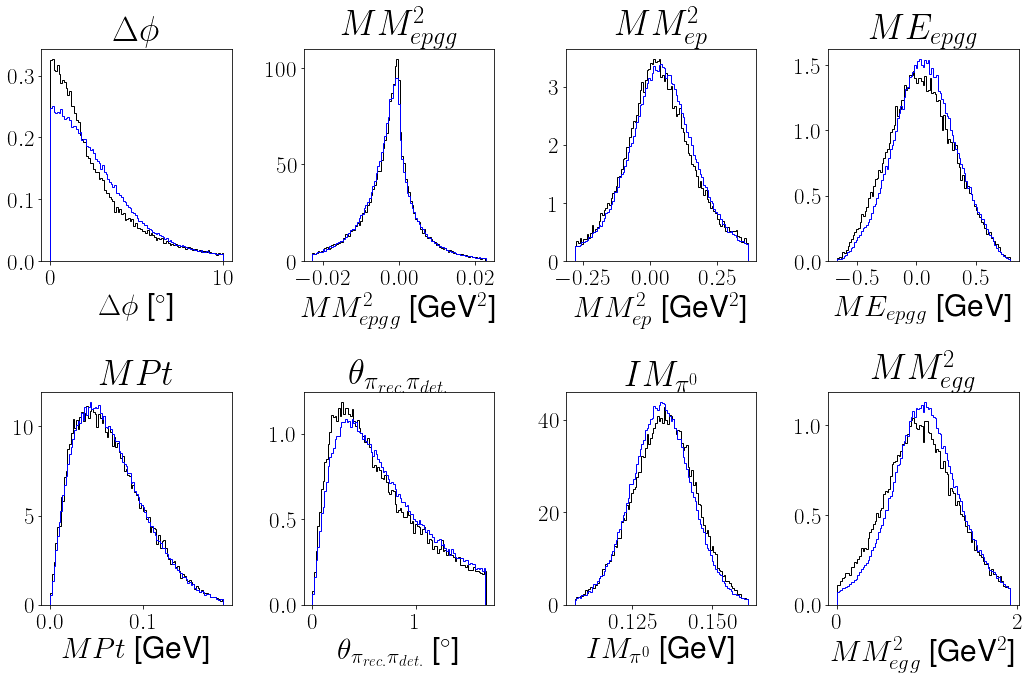

In [159]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 0:
            bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

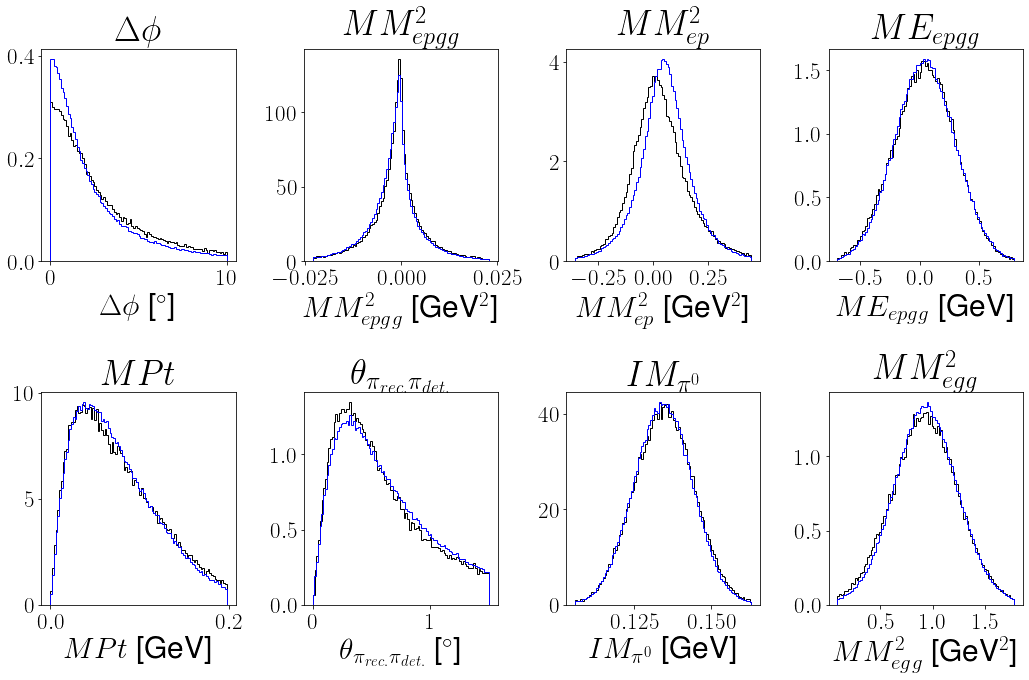

In [160]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 0:
            bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

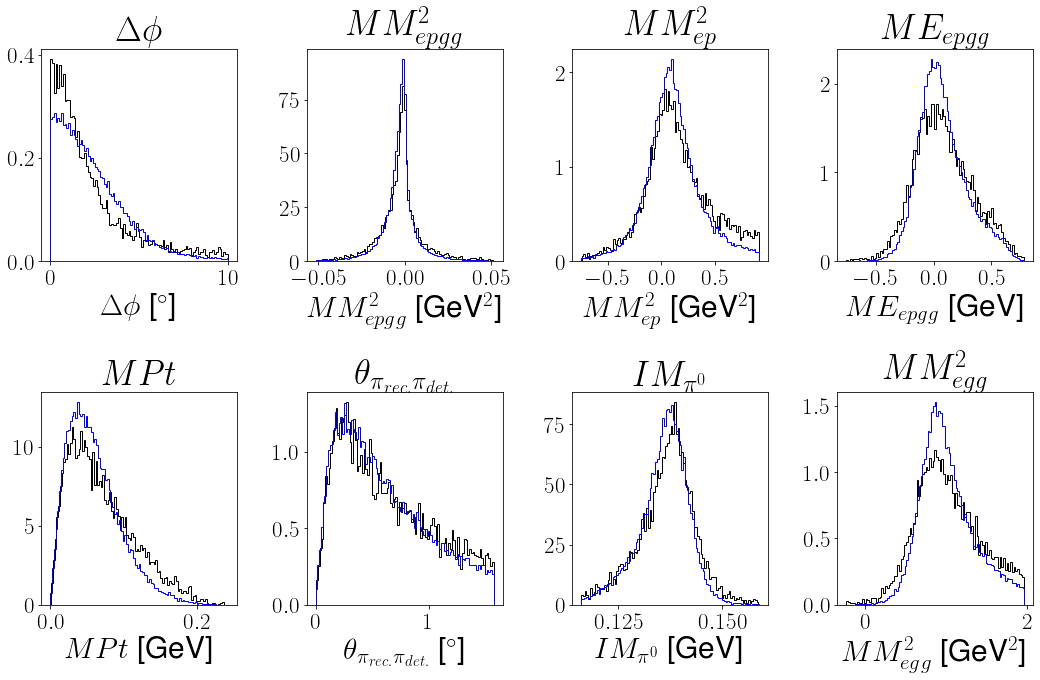

In [161]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 0:
            bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

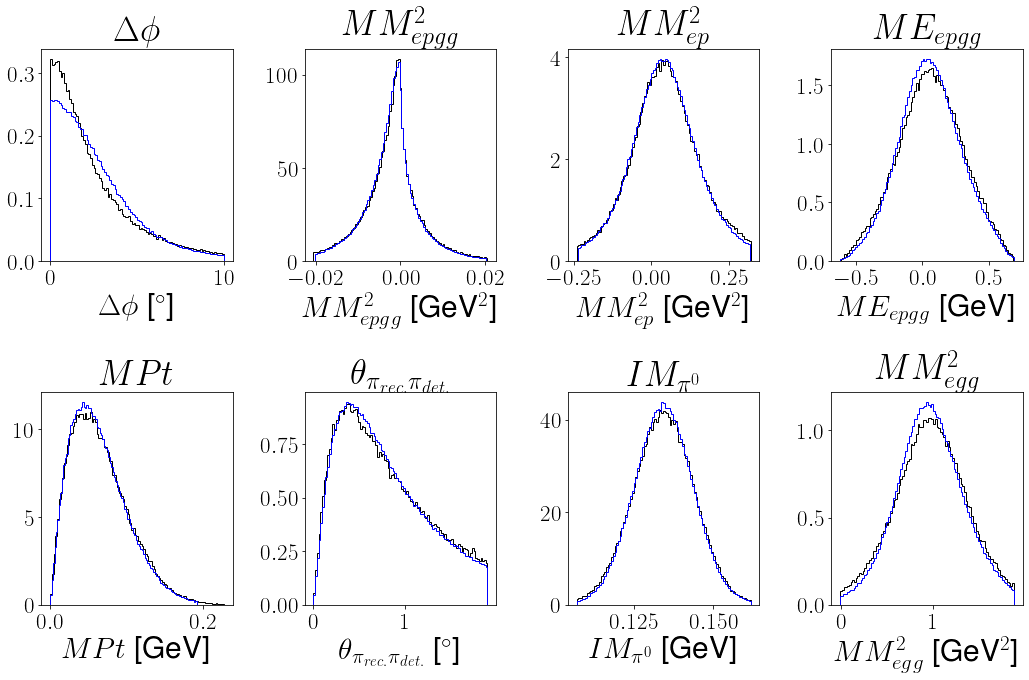

In [100]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 0:
            bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

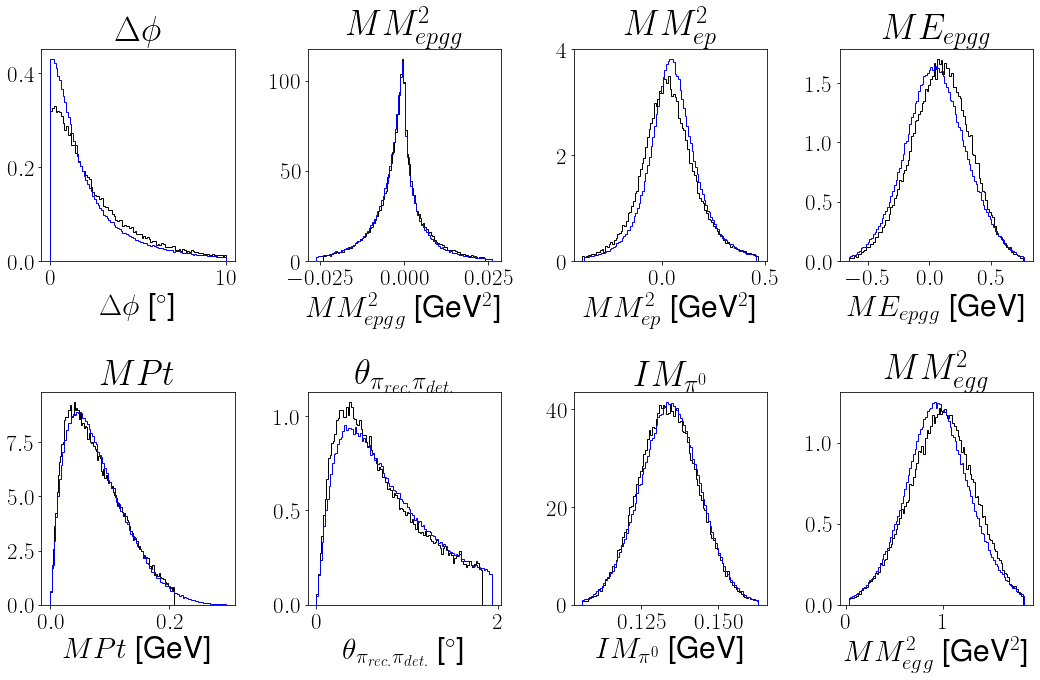

In [95]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 0:
            bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

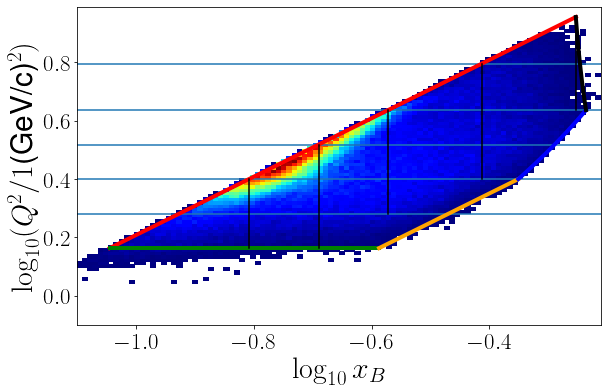

In [154]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
# plt.hist2d(epgExpInb.loc[epgExpInb.tmin2>0.3].xB, epgExpInb.loc[epgExpInb.tmin2>0.3].Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(np.log10(epgExpInbFD.xB), np.log10(epgExpInbFD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCD.xB), np.log10(epgExpInbCD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 1, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCDFT.xB), np.log10(epgExpInbCDFT.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
plt.hist2d(np.log10(epgExpInb.xB), np.log10(epgExpInb.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(-0.1, 0.99, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInb61.xB), np.log10(epgExpInb61.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)

k= 2*M*(np.sqrt(0.8**2+M**2)-M)
# plt.axvline(0.5)
# plt.axvline(0.4)
# plt.axvline(0.3)
# plt.axvline(0.2)
# plt.axvline(0.1)
x1 = 1.456/2/M/8.604
# plt.axvline(np.log10(x1))
x2 = 1.456/2/M/3
# plt.axvline(np.log10(x2))
x3 = 1-(4-M**2)/2/M/3
# plt.axvline(np.log10(x3))
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
# plt.axvline(np.log10(x4))
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
# plt.axvline(np.log10(x5))
y1 = 1.456
y2 = 1.456
y3 = 6*M*x3
plt.axhline(np.log10(y3))
y4 = (4-M**2)*x4/(1-x4)
plt.axhline(np.log10(y4))
y5 = 2*M*8.604*x5
plt.axhline(np.log10(y1*y3)/2)
plt.axhline(np.log10(y3*y4)/2)
plt.axhline(np.log10(y4*y5)/2)

l1 = np.linspace(x1, x5, 101)
plt.plot(np.log10(l1), np.log10(l1*2*M*(10.604-2)), color = 'r', linewidth = 4)
l2 = np.linspace(x1, x2, 101)
plt.plot(np.log10(l2), np.log10(y2+l2*0), color = 'green', linewidth = 4)
l3 = np.linspace(x2, x3, 101)
plt.plot(np.log10(l3), np.log10(l3*2*M*(3)), color = 'orange', linewidth = 4)
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
l4 = np.linspace(x3, x4, 101)
plt.plot(np.log10(l4), np.log10((4 - M*M)*l4/(1 - l4)), color = 'b', linewidth = 4)
l5 = np.linspace(x5, x4, 101)
plt.plot(np.log10(l5), np.log10(M*M*l5/(M*M*l5*l5/k-(1-l5))), color = 'k', linewidth = 4)

# c11 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/8.6048
# c12 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/3
# c1 = np.sqrt(y2*y3)/2/M/8.604
# plt.plot(np.linspace(np.log10(c1),np.log10(c1), 101), np.linspace(np.log10(y1), np.log10(np.sqrt(y1*y3)), 101))
c2 = y3/2/M/8.604
plt.plot(np.linspace(np.log10(c2),np.log10(c2), 101), np.linspace(np.log10(y1), np.log10(y3), 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
plt.plot(np.linspace(np.log10(c3),np.log10(c3), 101), np.linspace(np.log10(y1), np.log10(np.sqrt(y3*y4)), 101), color='k')
c4 = y4/2/M/8.604
plt.plot(np.linspace(np.log10(c4),np.log10(c4), 101), np.linspace(np.log10(np.sqrt(y1*y3)), np.log10(y4), 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
plt.plot(np.linspace(np.log10(c5),np.log10(c5), 101), np.linspace(np.log10(y3), np.log10(np.sqrt(y4*y5)), 101), color='k')
plt.plot(np.linspace(np.log10(x5),np.log10(x5), 101), np.linspace(np.log10(y4), np.log10(y5), 101), color='k')

plt.xlabel(r"$\log_{10} x_B$")
plt.ylabel(r"$\log_{10}(Q^2/1 $"+GeVc2+r"$)$")
plt.show()

## check phi smearing + noise 0

### inbending

In [30]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/00/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/00/bkg_1g/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
dvcsSimInb00 = df_3987_corr
bkgSimInb00 = df_4076_1g_corr
dvcsSimInbCDFT00 = dvcsSimInb00.loc[dvcsSimInb00.config == 3]
bkgSimInbCDFT00 = bkgSimInb00.loc[bkgSimInb00.config == 3]
dvcsSimInbCD00 = dvcsSimInb00.loc[dvcsSimInb00.config == 2]
bkgSimInbCD00 = bkgSimInb00.loc[bkgSimInb00.config == 2]
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD00)/len(pi0SimInbCD)/len(epgExpInbCD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT00)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

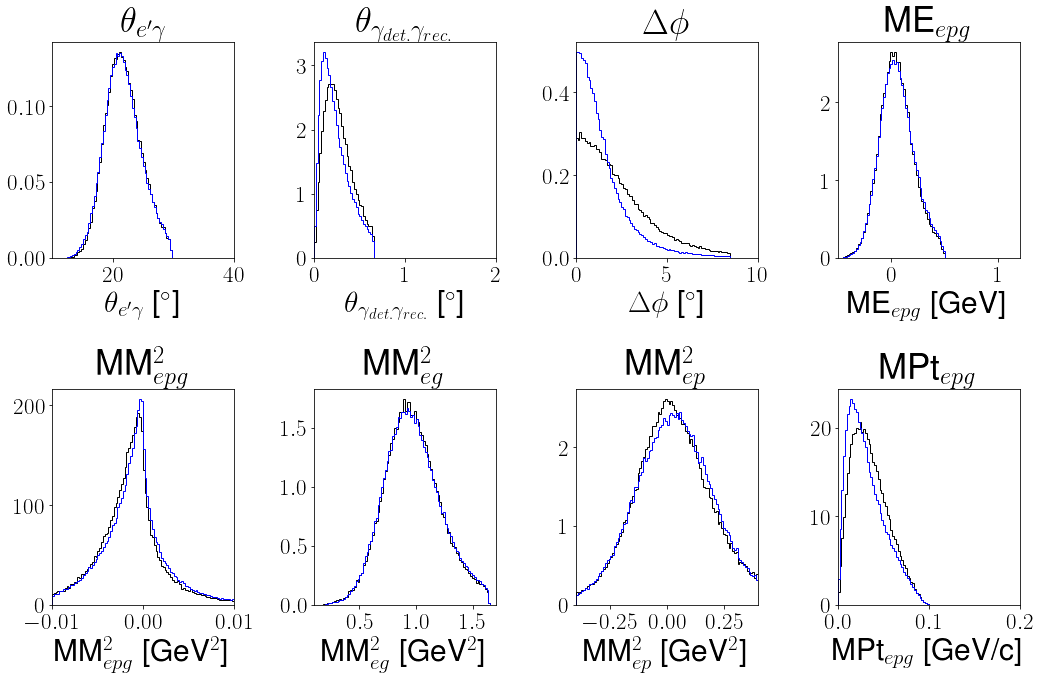

<Figure size 432x288 with 0 Axes>

In [41]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimInbCDFT00[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.97657230896125
reconGam 0.3080749393920157
coplanarity 2.2552030885169336
ME_epg 0.04594220115706073
MM2_epg -0.0009876027692358078
MM2_eg 0.8666027838481917
MM2_ep 0.0009789596747885407
MPt 0.049060375550359775


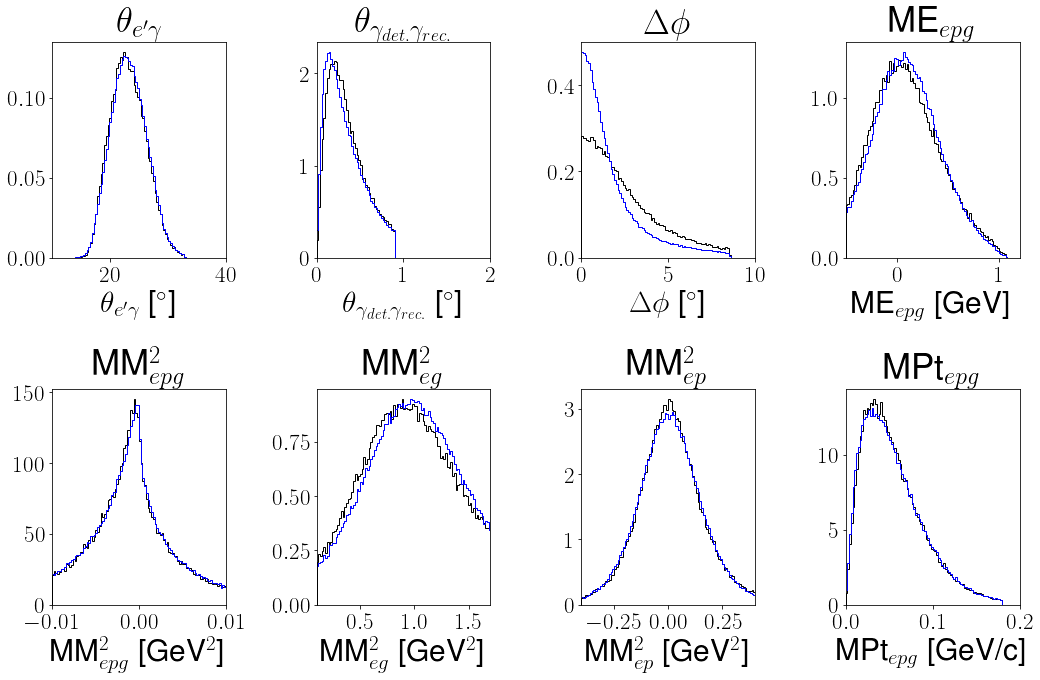

<Figure size 432x288 with 0 Axes>

In [42]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD00[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD00[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [80]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/00/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/00/bkg_1g/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
dvcsSimOutb00 = df_4240_corr
bkgSimOutb00 = df_4243_1g_corr
dvcsSimOutbCDFT00 = dvcsSimOutb00.loc[dvcsSimOutb00.config == 3]
bkgSimOutbCDFT00 = bkgSimOutb00.loc[bkgSimOutb00.config == 3]
dvcsSimOutbCD00 = dvcsSimOutb00.loc[dvcsSimOutb00.config == 2]
bkgSimOutbCD00 = bkgSimOutb00.loc[bkgSimOutb00.config == 2]
contCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD00)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT00)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)

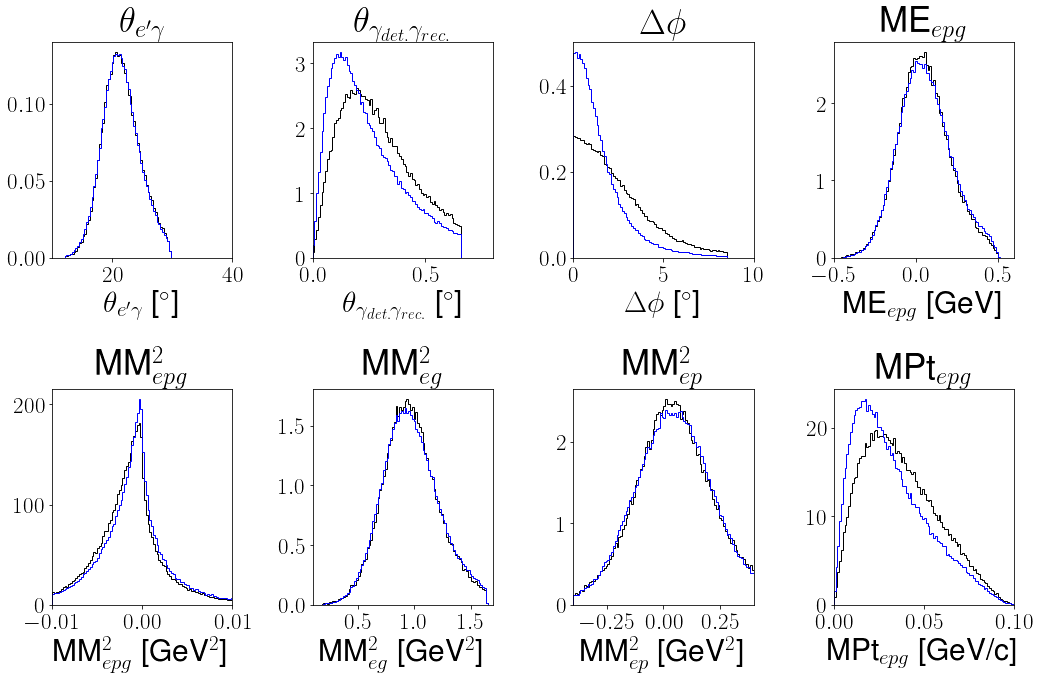

<Figure size 432x288 with 0 Axes>

In [83]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 0.6, 0.01, 1.7, 0.4, 0.1]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimOutbCDFT00[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

coneAngle 21.778539298274943
reconGam 0.33035316557361727
coplanarity 2.17198034113853
ME_epg 0.0632914435366023
MM2_epg -0.0009847188974567787
MM2_eg 0.9009686329768505
MM2_ep 0.024800676299464954
MPt 0.05150668052673767


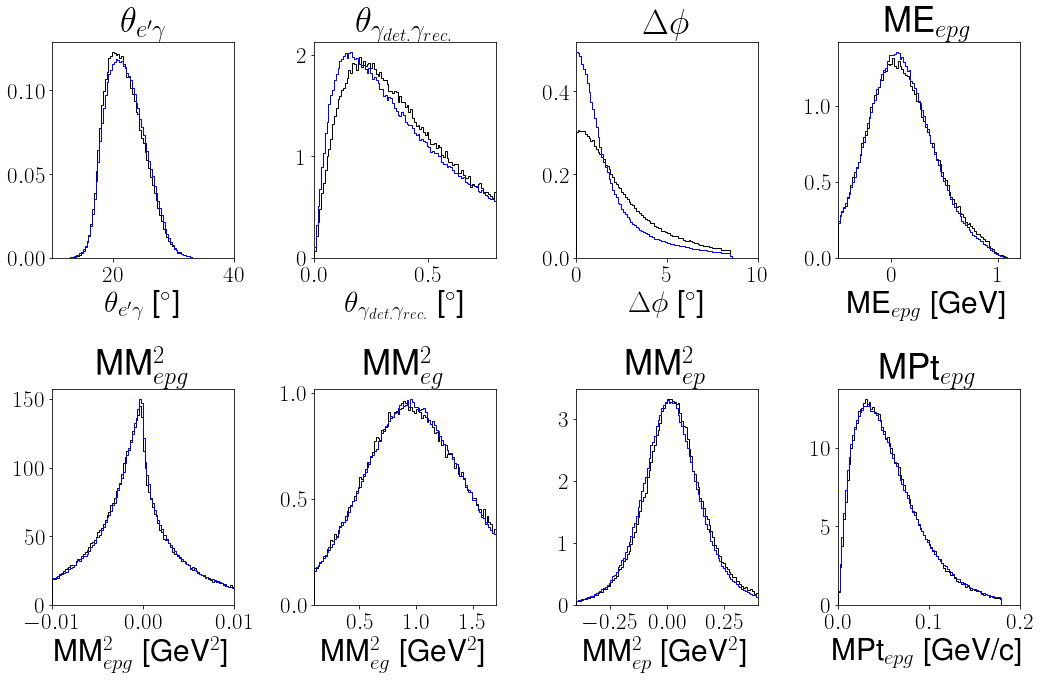

<Figure size 432x288 with 0 Axes>

In [84]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD00[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD00[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

## noise 1.5

In [93]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/15/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/15/bkg_1g/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
dvcsSimInb15 = df_3987_corr
bkgSimInb15 = df_4076_1g_corr
dvcsSimInbCDFT15 = dvcsSimInb15.loc[dvcsSimInb15.config == 3]
bkgSimInbCDFT15 = bkgSimInb15.loc[bkgSimInb15.config == 3]
dvcsSimInbCD15 = dvcsSimInb15.loc[dvcsSimInb15.config == 2]
bkgSimInbCD15 = bkgSimInb15.loc[bkgSimInb15.config == 2]
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD15)/len(pi0SimInbCD)/len(epgExpInbCD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT15)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

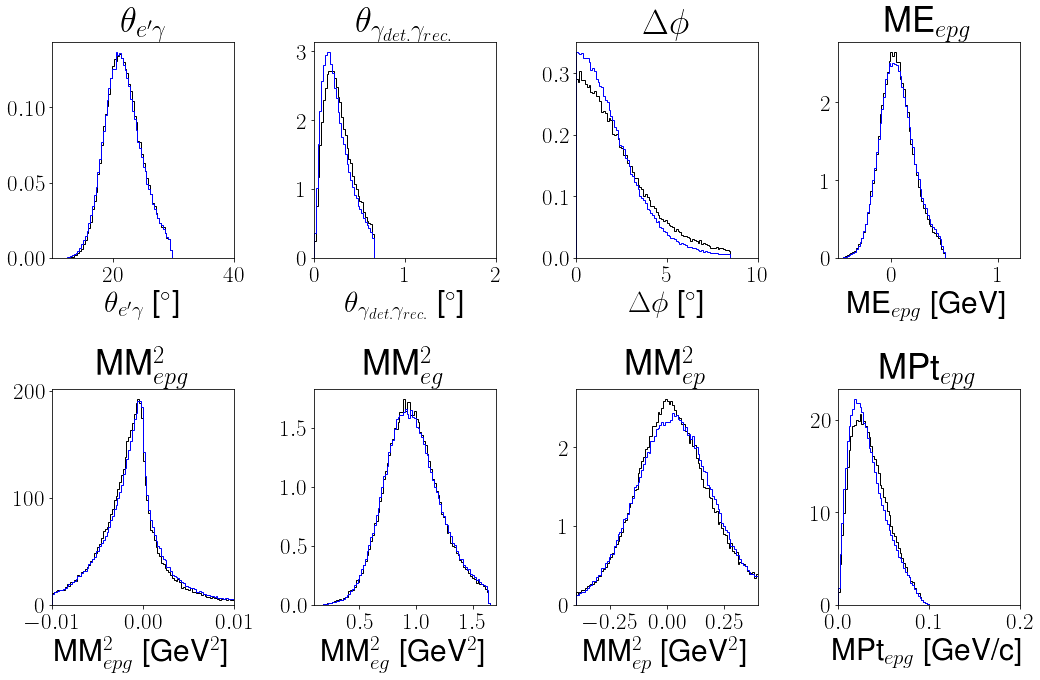

<Figure size 432x288 with 0 Axes>

In [94]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimInbCDFT15[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.959901822236624
reconGam 0.30327693780546294
coplanarity 2.2240897395676025
ME_epg 0.03859490837875192
MM2_epg -0.0009982280618744293
MM2_eg 0.8591356304739526
MM2_ep 0.0001498622262583825
MPt 0.04833398828498559


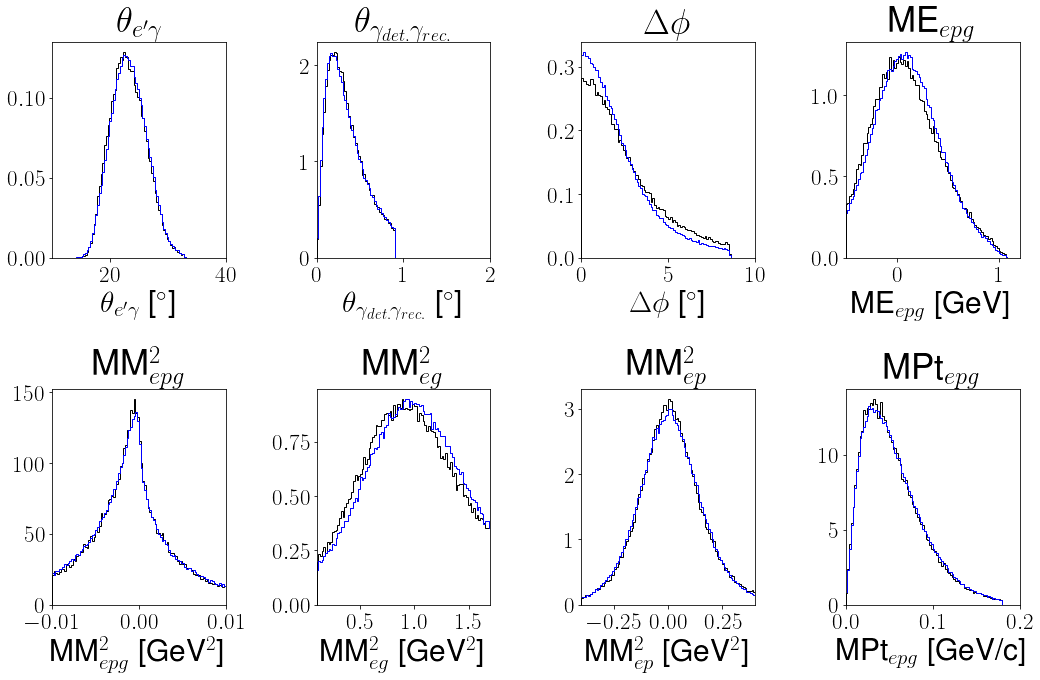

<Figure size 432x288 with 0 Axes>

In [96]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD15[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD15[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [97]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/15/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/15/bkg_1g/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
dvcsSimOutb15 = df_4240_corr
bkgSimOutb15 = df_4243_1g_corr
dvcsSimOutbCDFT15 = dvcsSimOutb15.loc[dvcsSimOutb15.config == 3]
bkgSimOutbCDFT15 = bkgSimOutb15.loc[bkgSimOutb15.config == 3]
dvcsSimOutbCD15 = dvcsSimOutb15.loc[dvcsSimOutb15.config == 2]
bkgSimOutbCD15 = bkgSimOutb15.loc[bkgSimOutb15.config == 2]
contCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD15)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT15)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)

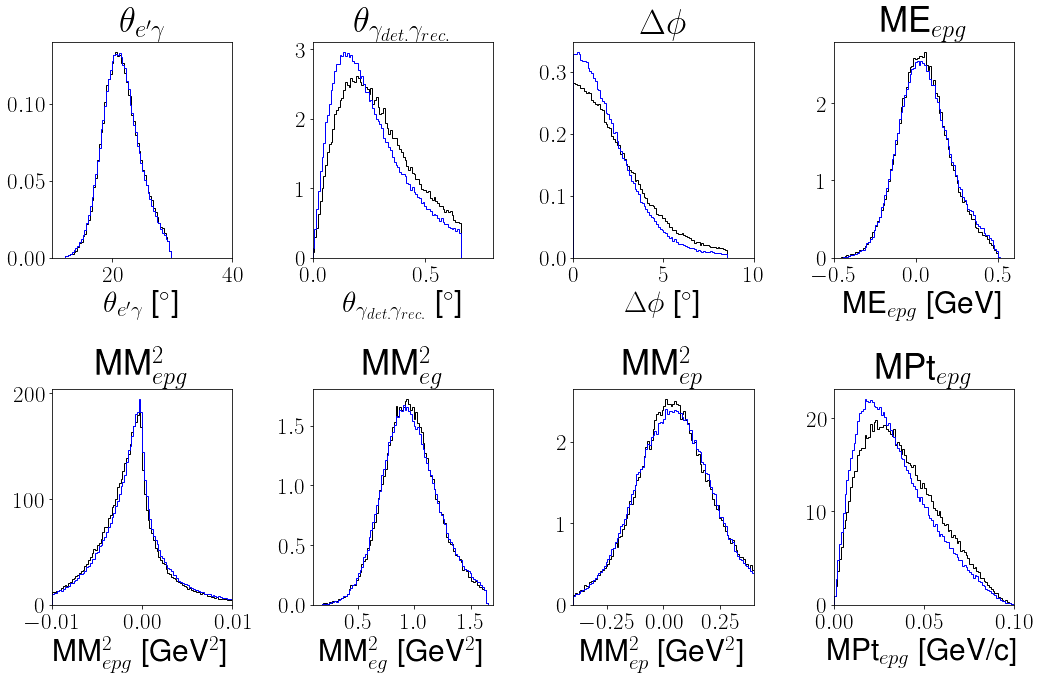

<Figure size 432x288 with 0 Axes>

In [98]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 0.6, 0.01, 1.7, 0.4, 0.1]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimOutbCDFT15[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

coneAngle 21.778539298274943
reconGam 0.33035316557361727
coplanarity 2.17198034113853
ME_epg 0.0632914435366023
MM2_epg -0.0009847188974567787
MM2_eg 0.9009686329768505
MM2_ep 0.024800676299464954
MPt 0.05150668052673767


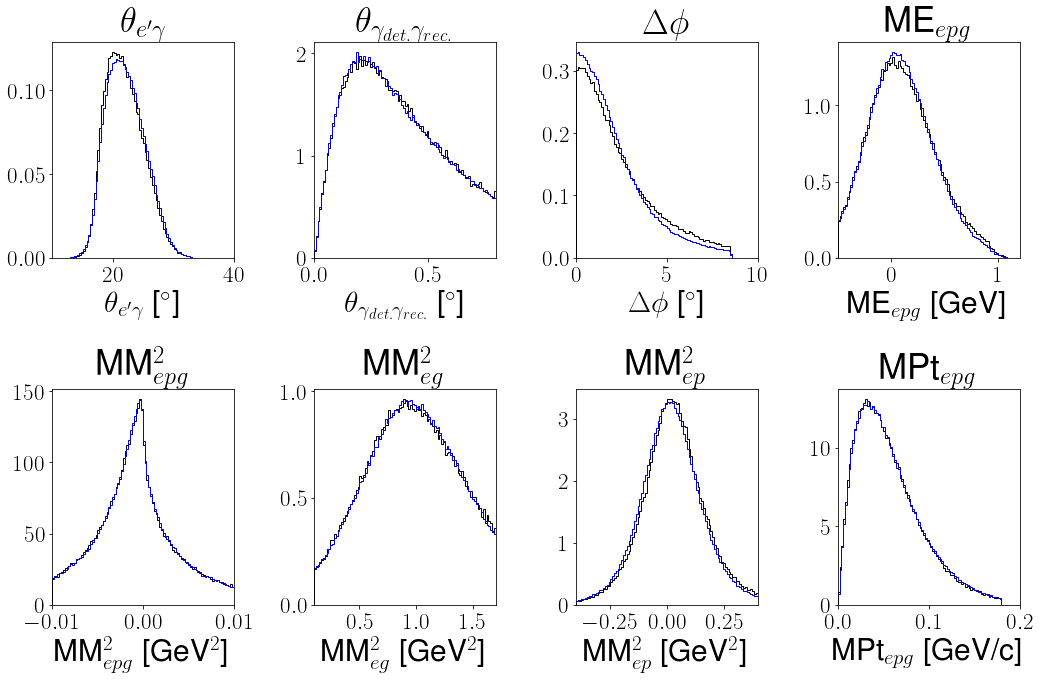

<Figure size 432x288 with 0 Axes>

In [99]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD15[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD15[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

### noise 1.8

In [101]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/18/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/18/bkg_1g/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
dvcsSimInb18 = df_3987_corr
bkgSimInb18 = df_4076_1g_corr
dvcsSimInbCDFT18 = dvcsSimInb18.loc[dvcsSimInb18.config == 3]
bkgSimInbCDFT18 = bkgSimInb18.loc[bkgSimInb18.config == 3]
dvcsSimInbCD18 = dvcsSimInb18.loc[dvcsSimInb18.config == 2]
bkgSimInbCD18 = bkgSimInb18.loc[bkgSimInb18.config == 2]
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD18)/len(pi0SimInbCD)/len(epgExpInbCD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT18)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

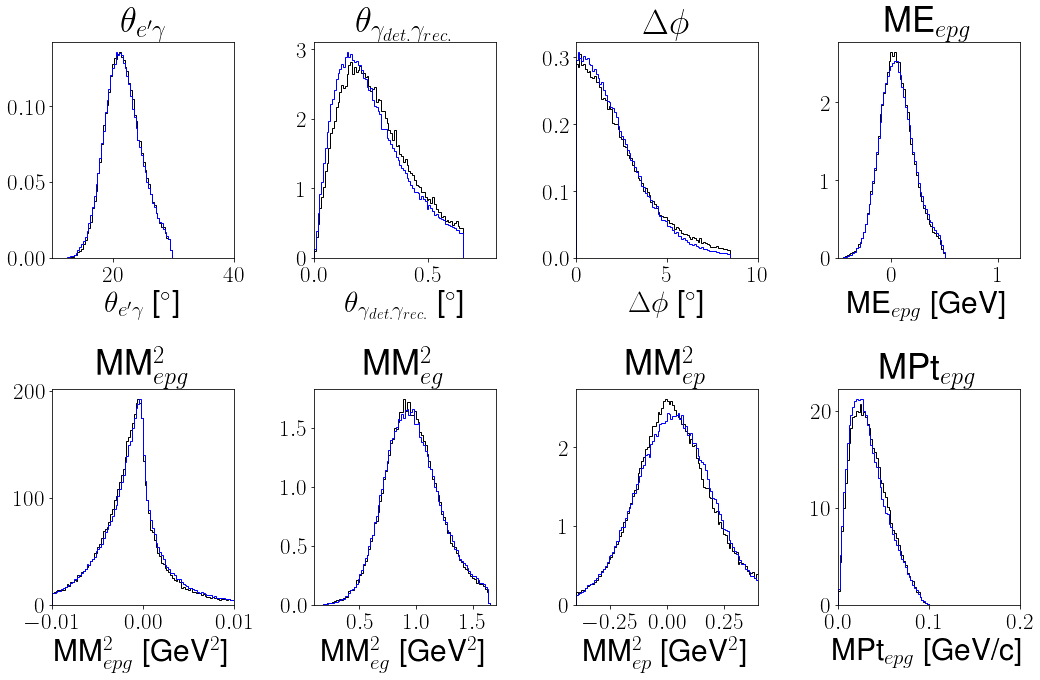

<Figure size 432x288 with 0 Axes>

In [104]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimInbCDFT18[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.955625574661273
reconGam 0.3041909158309725
coplanarity 2.2375989145556052
ME_epg 0.03809297782318736
MM2_epg -0.0009988371763299778
MM2_eg 0.8588481792371869
MM2_ep 0.0003889539569511658
MPt 0.04832900751079476


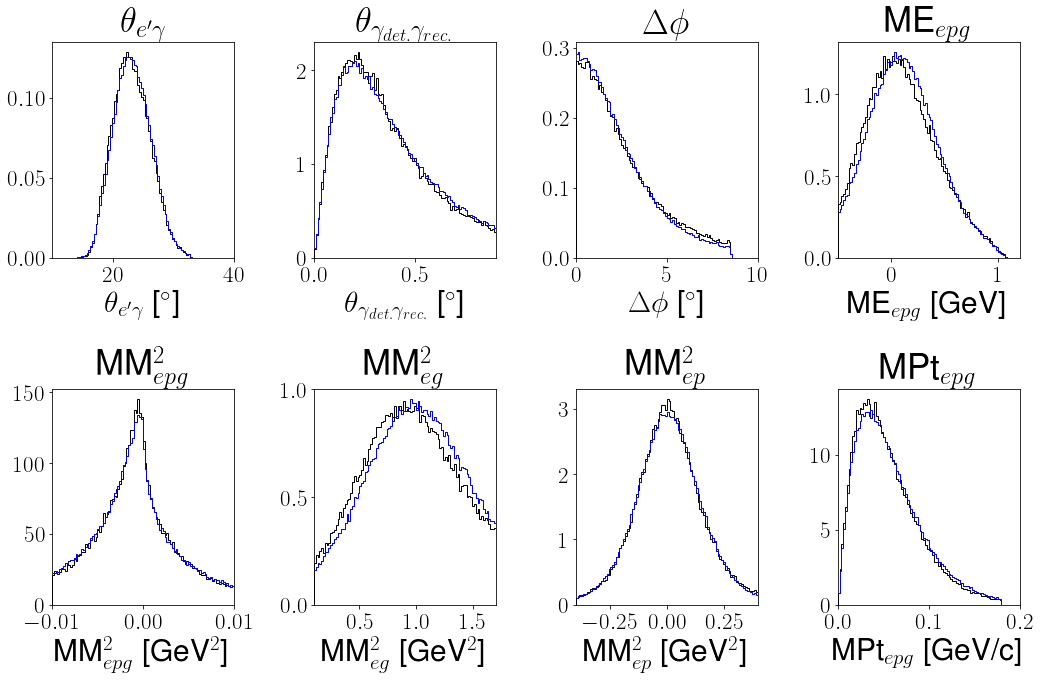

<Figure size 432x288 with 0 Axes>

In [120]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.9, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD18[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD18[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [107]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/18/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/18/bkg_1g/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
dvcsSimOutb18 = df_4240_corr
bkgSimOutb18 = df_4243_1g_corr
dvcsSimOutbCDFT18 = dvcsSimOutb18.loc[dvcsSimOutb18.config == 3]
bkgSimOutbCDFT18 = bkgSimOutb18.loc[bkgSimOutb18.config == 3]
dvcsSimOutbCD18 = dvcsSimOutb18.loc[dvcsSimOutb18.config == 2]
bkgSimOutbCD18 = bkgSimOutb18.loc[bkgSimOutb18.config == 2]
contCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD18)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT18)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)

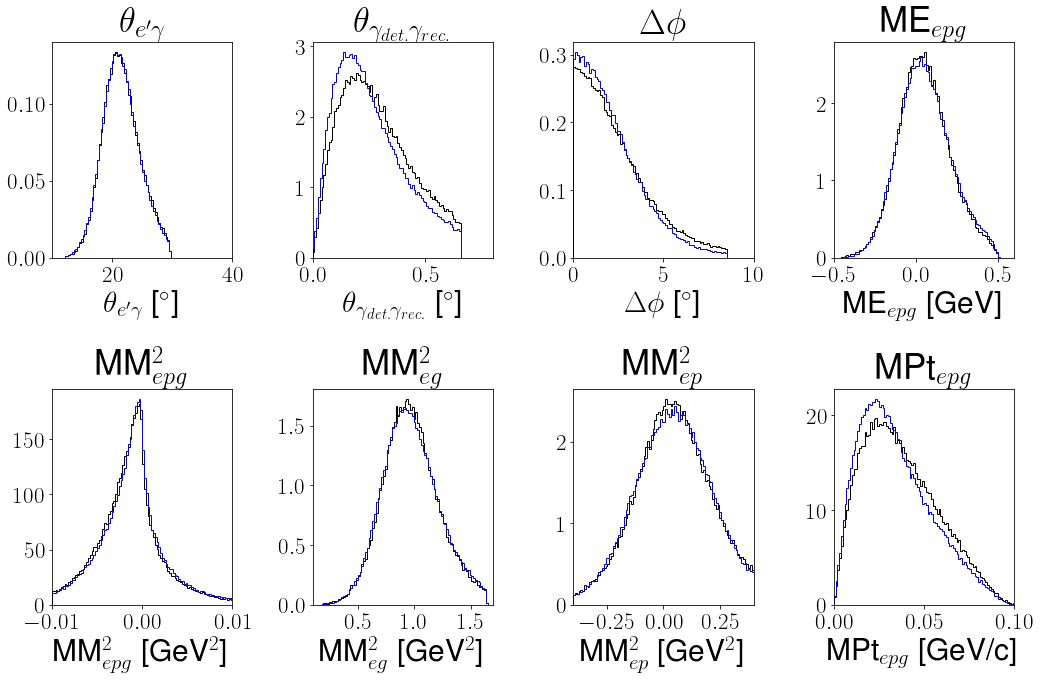

<Figure size 432x288 with 0 Axes>

In [108]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 0.6, 0.01, 1.7, 0.4, 0.1]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimOutbCDFT18[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

coneAngle 21.780641539383236
reconGam 0.3305635627319527
coplanarity 2.1812610273687225
ME_epg 0.06275433326591273
MM2_epg -0.000999552954443081
MM2_eg 0.8999950652996916
MM2_ep 0.024620271738486067
MPt 0.051587008716575664


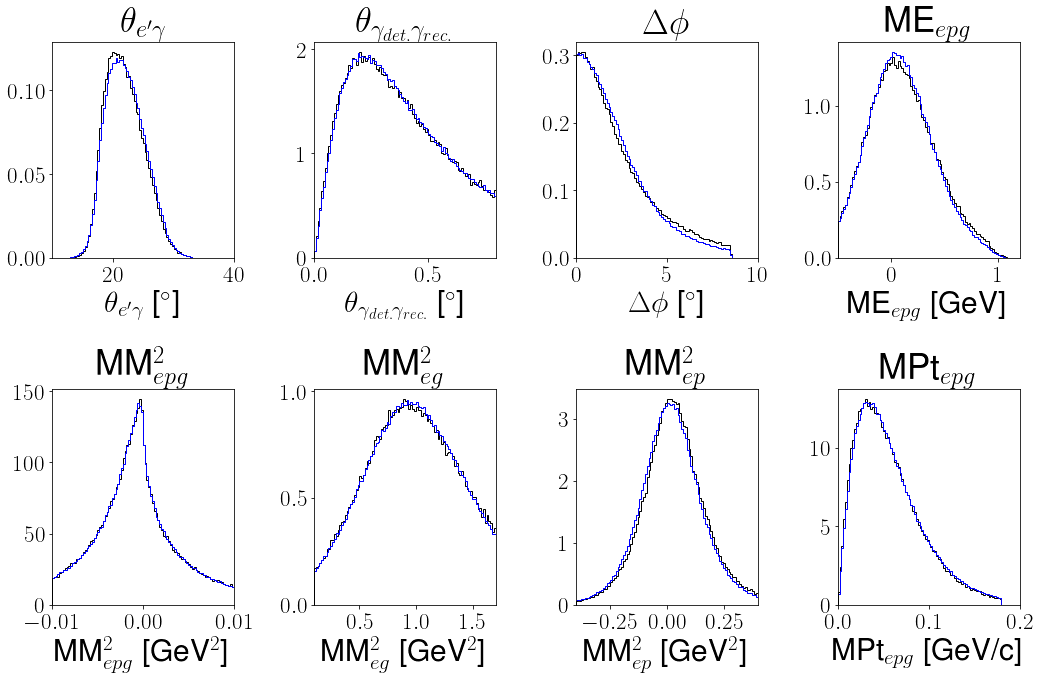

<Figure size 432x288 with 0 Axes>

In [119]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD18[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD18[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

### noise 2.0

In [111]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/20/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/inb/20/bkg_1g/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
dvcsSimInb20 = df_3987_corr
bkgSimInb20 = df_4076_1g_corr
dvcsSimInbCDFT20 = dvcsSimInb20.loc[dvcsSimInb20.config == 3]
bkgSimInbCDFT20 = bkgSimInb20.loc[bkgSimInb20.config == 3]
dvcsSimInbCD20 = dvcsSimInb20.loc[dvcsSimInb20.config == 2]
bkgSimInbCD20 = bkgSimInb20.loc[bkgSimInb20.config == 2]
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD20)/len(pi0SimInbCD)/len(epgExpInbCD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT20)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

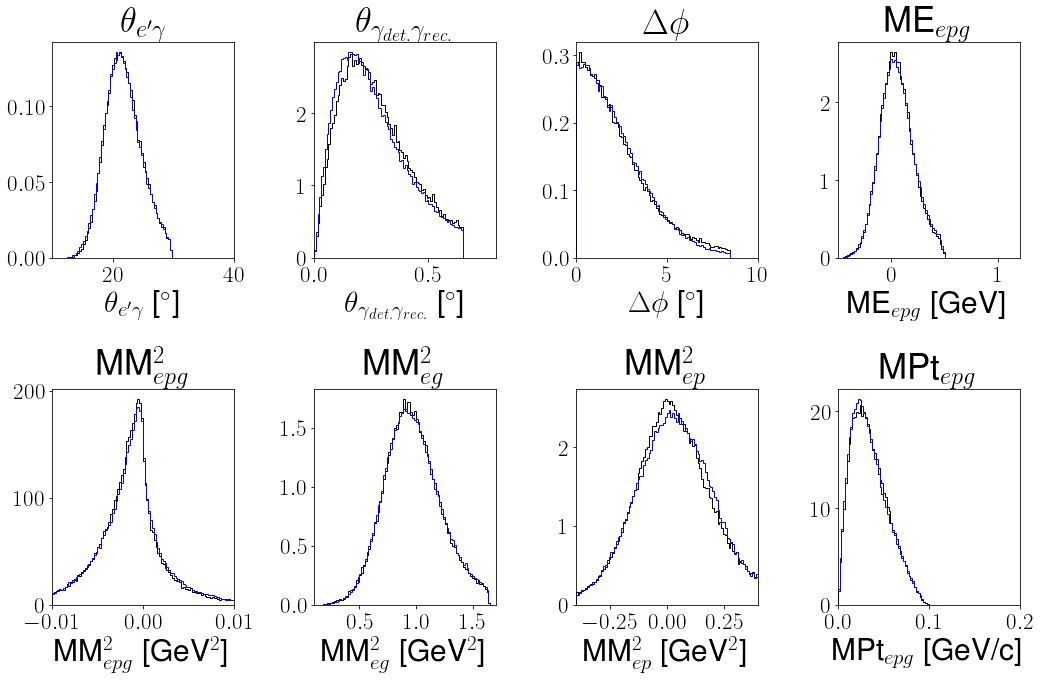

<Figure size 432x288 with 0 Axes>

In [112]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimInbCDFT20[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 22.961303085305158
reconGam 0.30365538669461256
coplanarity 2.2343425413954012
ME_epg 0.03997735306254678
MM2_epg -0.0009894328298879944
MM2_eg 0.8596784314951048
MM2_ep 0.00010846573437302642
MPt 0.04847591903211742


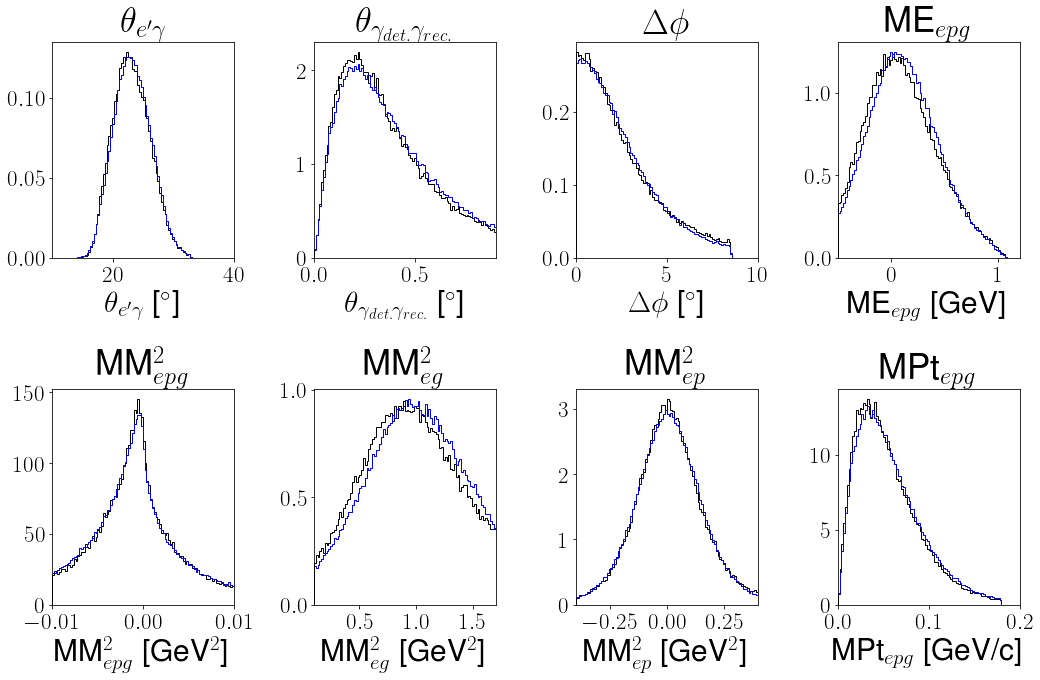

<Figure size 432x288 with 0 Axes>

In [118]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.9, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD20[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD20[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [114]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/20/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_checkPphi/outb/20/bkg_1g/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
dvcsSimOutb20 = df_4240_corr
bkgSimOutb20 = df_4243_1g_corr
dvcsSimOutbCDFT20 = dvcsSimOutb20.loc[dvcsSimOutb20.config == 3]
bkgSimOutbCDFT20 = bkgSimOutb20.loc[bkgSimOutb20.config == 3]
dvcsSimOutbCD20 = dvcsSimOutb20.loc[dvcsSimOutb20.config == 2]
bkgSimOutbCD20 = bkgSimOutb20.loc[bkgSimOutb20.config == 2]
contCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD20)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT20)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)

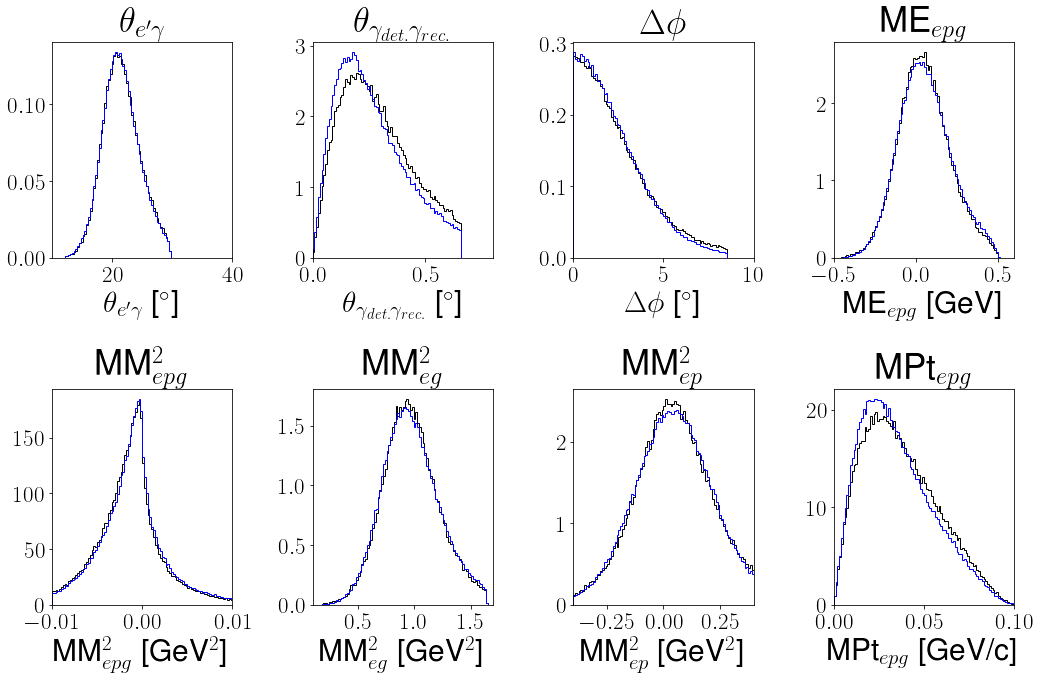

<Figure size 432x288 with 0 Axes>

In [116]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 0.6, 0.01, 1.7, 0.4, 0.1]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(dvcsSimOutbCDFT20[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()

coneAngle 21.77809780342756
reconGam 0.33022656202165923
coplanarity 2.1748310152843966
ME_epg 0.06290318163338764
MM2_epg -0.0009948407761544245
MM2_eg 0.900651098280726
MM2_ep 0.02456464982271096
MPt 0.051554324816114806


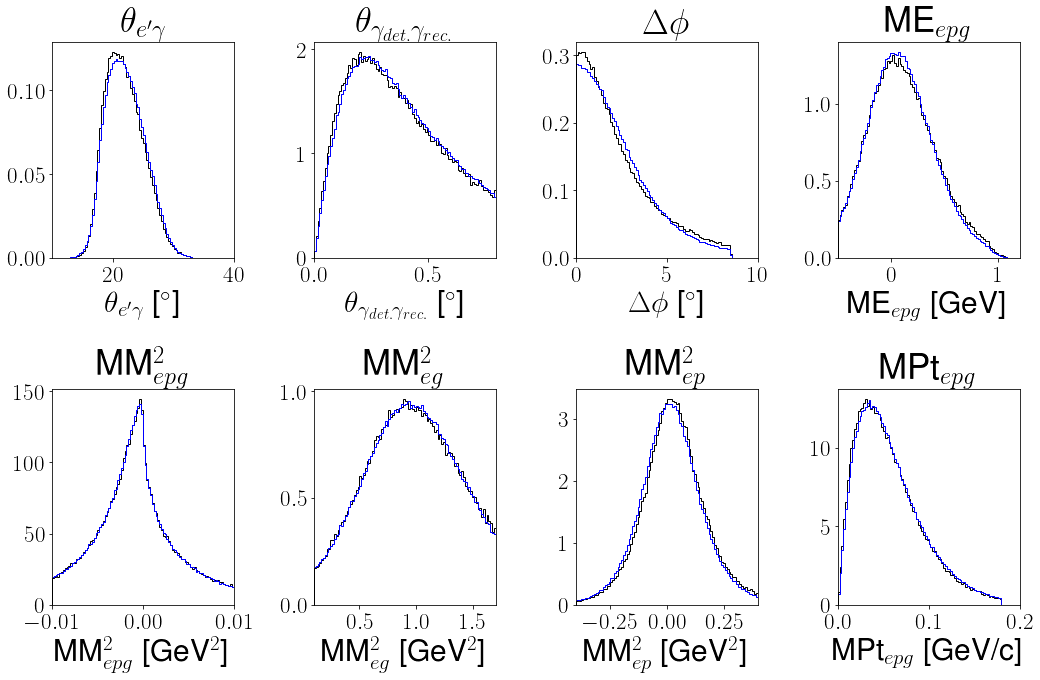

<Figure size 432x288 with 0 Axes>

In [117]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.8, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD20[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD20[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
plt.show()
plt.clf()